In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("PCA+India+Data_Census.xlsx")

### Basics

In [45]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df.shape

(640, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [193]:
df.describe().round(1)

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0,...,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0
mean,17.1,320.5,51222.9,79940.6,122372.1,12309.1,11942.3,13820.9,20778.4,6191.8,...,1393.0,2757.0,250.9,558.1,560.7,1293.4,71.4,200.7,510.0,704.8
std,9.4,184.9,48135.4,73384.5,113600.7,11500.9,11326.3,14426.4,21727.9,9912.7,...,1489.7,2788.8,453.3,1117.6,762.6,1585.4,107.9,309.7,610.6,910.2
min,1.0,1.0,350.0,391.0,698.0,56.0,56.0,0.0,0.0,0.0,...,4.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
25%,9.0,160.8,19484.0,30228.0,46517.8,4733.8,4672.2,3466.2,5603.2,293.8,...,489.5,957.2,47.0,109.0,136.5,298.0,14.0,43.0,161.0,220.5
50%,18.0,320.5,35837.0,58339.0,87724.5,9159.0,8663.0,9591.5,13709.0,2333.5,...,949.0,1928.0,114.5,247.5,308.0,717.0,35.0,113.0,326.0,464.5
75%,24.0,480.2,68892.0,107918.5,164251.8,16520.2,15902.2,19429.8,29180.0,7658.0,...,1714.0,3599.8,270.8,568.8,642.0,1710.8,79.0,240.0,604.5,853.5
max,35.0,640.0,310450.0,485417.0,750392.0,96223.0,95129.0,103307.0,156429.0,96785.0,...,9875.0,21611.0,5775.0,17153.0,6116.0,13714.0,895.0,3354.0,6456.0,10533.0


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

### EDA


#### Univariate Analysis

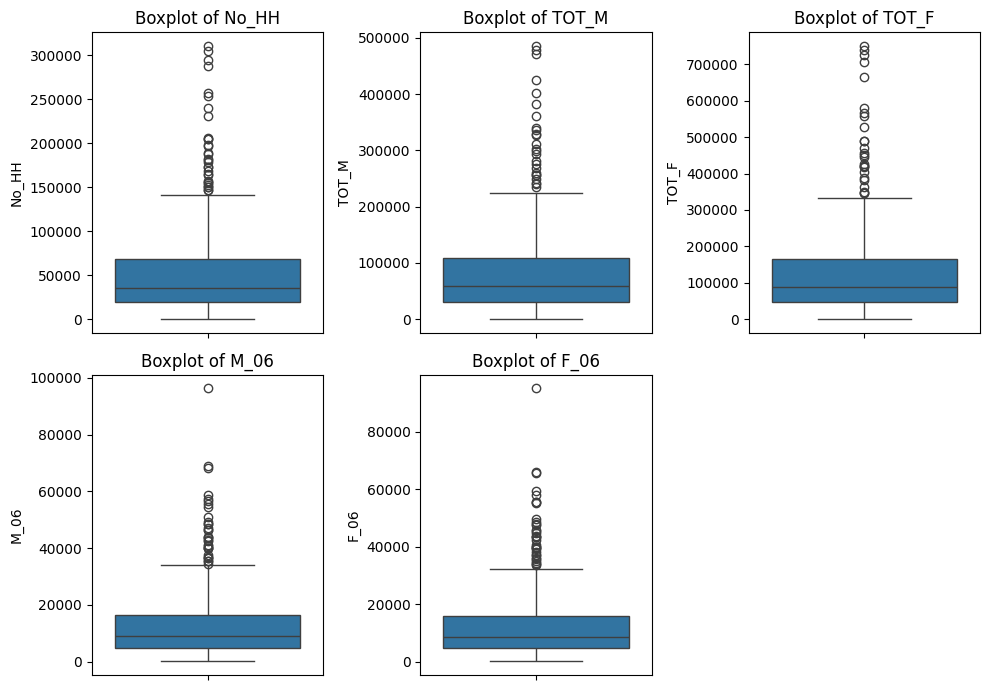

In [47]:
plt.figure(figsize = (10,7))
feature_list = df.columns
for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y = df[feature_list[i+4]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i+4]))
    plt.tight_layout()

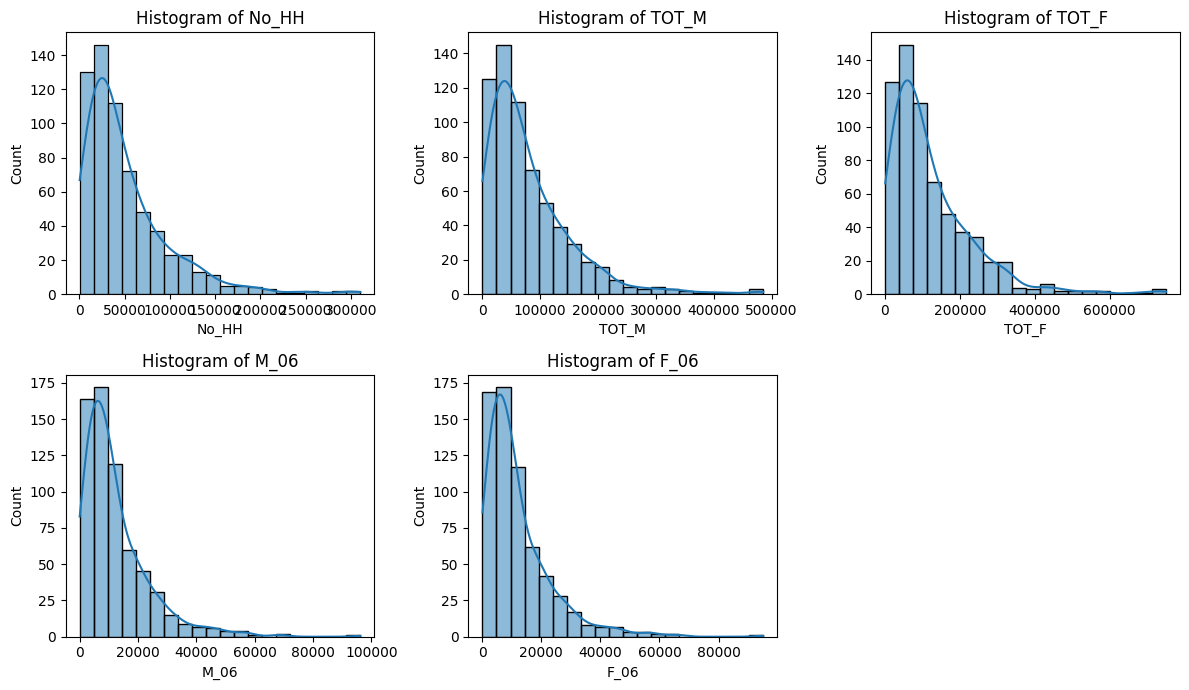

In [49]:
plt.figure(figsize = (12,7))
feature_list = df.columns
for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.histplot(x = df[feature_list[i+4]], bins=20, kde=True)
    plt.title('Histogram of {}'.format(feature_list[i+4]))
    plt.tight_layout()

In [10]:
df_eda = df.iloc[:,0:9]

In [30]:
df_eda.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587


In [ ]:
sns.boxplot(df_eda[['No_HH','TOT_M','TOT_F','M_06','F_06']]);

In [ ]:
# df_eda.sort_values(by=df_eda.groupby('State')['No_HH'])
plt.figure(figsize=[12,7])
sns.barplot(data=df_eda, x='State', y='No_HH', errorbar=None);
plt.xticks(rotation=90);

In [4]:
df_states = df_eda.groupby(['State']).sum().sort_values(by='No_HH', ascending=False)

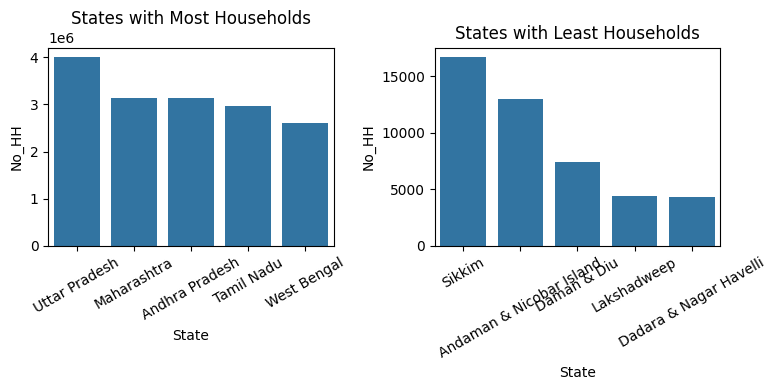

In [43]:
plt.figure(figsize=[8,4])
df_states.sort_values(by='No_HH', ascending=False, inplace=True)
plt.subplot(121)
sns.barplot(data=df_states.head(), x='State', y='No_HH', errorbar=None);
plt.title('States with Most Households')
plt.xticks(rotation=30);
plt.subplot(122)
sns.barplot(data=df_states.tail(), x='State', y='No_HH', errorbar=None);
plt.title('States with Least Households')
plt.xticks(rotation=30);
plt.tight_layout()

In [109]:
df_states.head()

,State Code,Dist.Code,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06
State,,,,,,,,
Uttar Pradesh,639,11857,SaharanpurMuzaffarnagarBijnorMoradabadRampurJy...,4006871,9043969,12023885,1603472,1579630
Maharashtra,945,17990,NandurbarDhuleJalgaonBuldanaAkolaWashimAmravat...,3136214,4196130,7138557,574800,572064
Andhra Pradesh,644,12489,AdilabadNizamabadKarimnagarMedakHyderabadRanga...,3127287,3274363,6097235,397550,385729
Tamil Nadu,1056,19760,ThiruvallurChennaiKancheepuramVelloreTiruvanna...,2964700,3074009,5610310,365103,348264
West Bengal,361,6384,Darjiling Jalpaiguri Koch Bihar Uttar Dinajpur...,2615284,3912553,6016118,485722,482106


In [ ]:
df_states.sort_values(by='TOT_M', inplace=True, ascending=False)
plt.figure(figsize=[4,4])
sns.barplot(data=df_states.head(), x='State', y='TOT_M', errorbar=None);
plt.xticks(rotation=45);

In [ ]:
df_states.sort_values(by='TOT_F', inplace=True, ascending=False)
plt.figure(figsize=[4,4])
sns.barplot(data=df_states.head(), x='State', y='TOT_F', errorbar=None);
plt.xticks(rotation=45);

In [ ]:
sns.scatterplot(data=df_states, x='TOT_M', y='TOT_F');

In [144]:
df_eda.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587


In [ ]:
sns.scatterplot(data=df_eda, x='TOT_M', y='TOT_F', hue='State');
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left');

#### Ratios

In [18]:
df_eda['MF_Ratio'] = round(df_eda['TOT_M'] / df_eda['TOT_F'],2)

In [19]:
df_eda['MF06_Ratio'] = round(df_eda['M_06'] / df_eda['F_06'],2)

In [27]:
df_states['MF_Ratio'] = round(df_states['TOT_M'] / df_states['TOT_F'],2)

In [28]:
df_states['MF06_Ratio'] = round(df_states['M_06'] / df_states['F_06'],2)

In [149]:
df_eda['MF06_Ratio'].head()

0    0.95
1    1.20
2    1.06
3    0.83
4    1.12
Name: MF06_Ratio, dtype: float64

In [24]:
df_eda['MF06_Ratio'].describe().round(2)

count    640.00
mean       1.04
std        0.06
min        0.81
25%        1.00
50%        1.03
75%        1.06
max        1.32
Name: MF06_Ratio, dtype: float64

In [159]:
df_eda['MF_Ratio'].describe().round(2)

count    640.00
mean       0.66
std        0.09
min        0.44
25%        0.59
50%        0.66
75%        0.73
max        0.87
Name: MF_Ratio, dtype: float64

In [147]:
df_eda['MF_Ratio'].head()

0    0.78
1    0.85
2    0.60
3    0.66
4    0.69
Name: MF_Ratio, dtype: float64

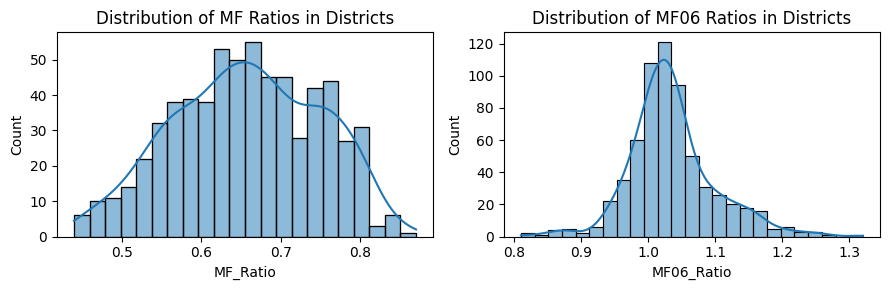

In [26]:
plt.figure(figsize=[9,3])
plt.subplot(121)
sns.histplot(x='MF_Ratio', data=df_eda, binwidth=.02, kde=True);
plt.title('Distribution of MF Ratios in Districts')
plt.subplot(122)
sns.histplot(x='MF06_Ratio', data=df_eda, bins=25, kde=True);
plt.title('Distribution of MF06 Ratios in Districts')
plt.tight_layout()

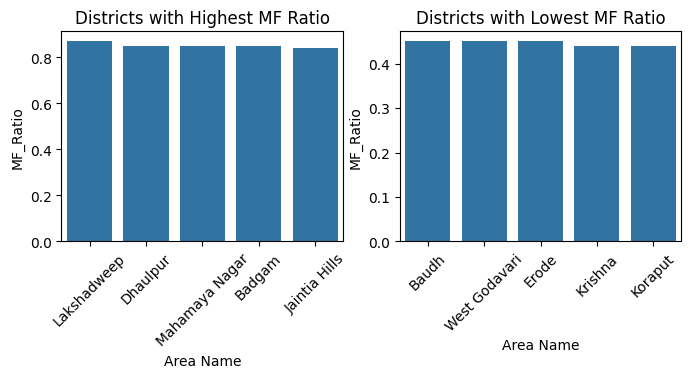

In [40]:
df_eda.sort_values(by='MF_Ratio', inplace=True, ascending=False)
plt.figure(figsize=[8,6])
plt.subplot(221)
sns.barplot(data=df_eda.head(), x='Area Name', y='MF_Ratio', errorbar=None);
plt.xticks(rotation=45);
plt.title('Districts with Highest MF Ratio')
plt.subplot(222)
sns.barplot(data=df_eda.tail(), x='Area Name', y='MF_Ratio', errorbar=None);
plt.xticks(rotation=45);
plt.title('Districts with Lowest MF Ratio');

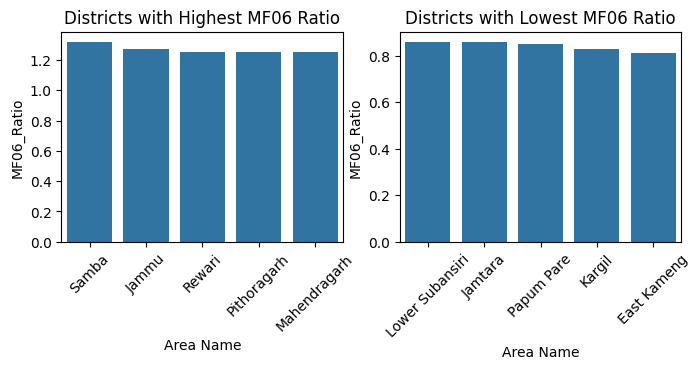

In [41]:
df_eda.sort_values(by='MF06_Ratio', inplace=True, ascending=False)
plt.figure(figsize=[8,6])
plt.subplot(221)
sns.barplot(data=df_eda.head(), x='Area Name', y='MF06_Ratio', errorbar=None);
plt.xticks(rotation=45);
plt.title('Districts with Highest MF06 Ratio')
plt.subplot(222)
sns.barplot(data=df_eda.tail(), x='Area Name', y='MF06_Ratio', errorbar=None);
plt.xticks(rotation=45);
plt.title('Districts with Lowest MF06 Ratio');

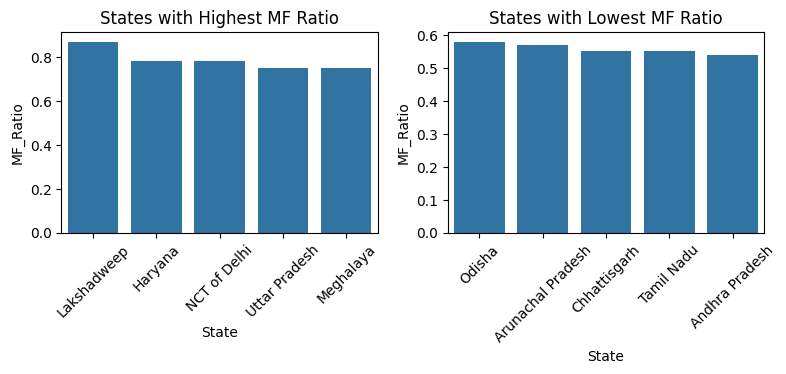

In [38]:
df_states.sort_values(by='MF_Ratio', inplace=True, ascending=False)
plt.figure(figsize=[8,6])
plt.subplot(221)
sns.barplot(data=df_states.head(), x='State', y='MF_Ratio', errorbar=None);
plt.xticks(rotation=45);
plt.title('States with Highest MF Ratio')
plt.subplot(222)
sns.barplot(data=df_states.tail(), x='State', y='MF_Ratio', errorbar=None);
plt.xticks(rotation=45);
plt.title('States with Lowest MF Ratio');
plt.tight_layout()

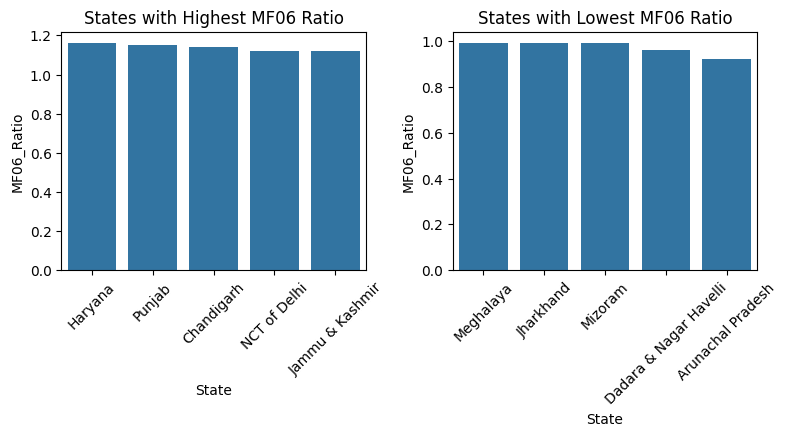

In [44]:
df_states.sort_values(by='MF06_Ratio', inplace=True, ascending=False)
plt.figure(figsize=[8,7])
plt.subplot(221)
sns.barplot(data=df_states.head(), x='State', y='MF06_Ratio', errorbar=None);
plt.xticks(rotation=45);
plt.title('States with Highest MF06 Ratio')
plt.subplot(222)
sns.barplot(data=df_states.tail(), x='State', y='MF06_Ratio', errorbar=None);
plt.xticks(rotation=45);
plt.title('States with Lowest MF06 Ratio');
plt.tight_layout()

### PCA

In [51]:
df_pca = df.iloc[:,4:]

In [52]:
df_pca.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


In [53]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [54]:
feature_list = df_pca.columns

In [55]:
for i in feature_list:
    LL, UL = remove_outlier(df_pca[i])
    df_pca[i] = np.where(df_pca[i] > UL, UL, df_pca[i])
    df_pca[i] = np.where(df_pca[i] < LL, LL, df_pca[i])

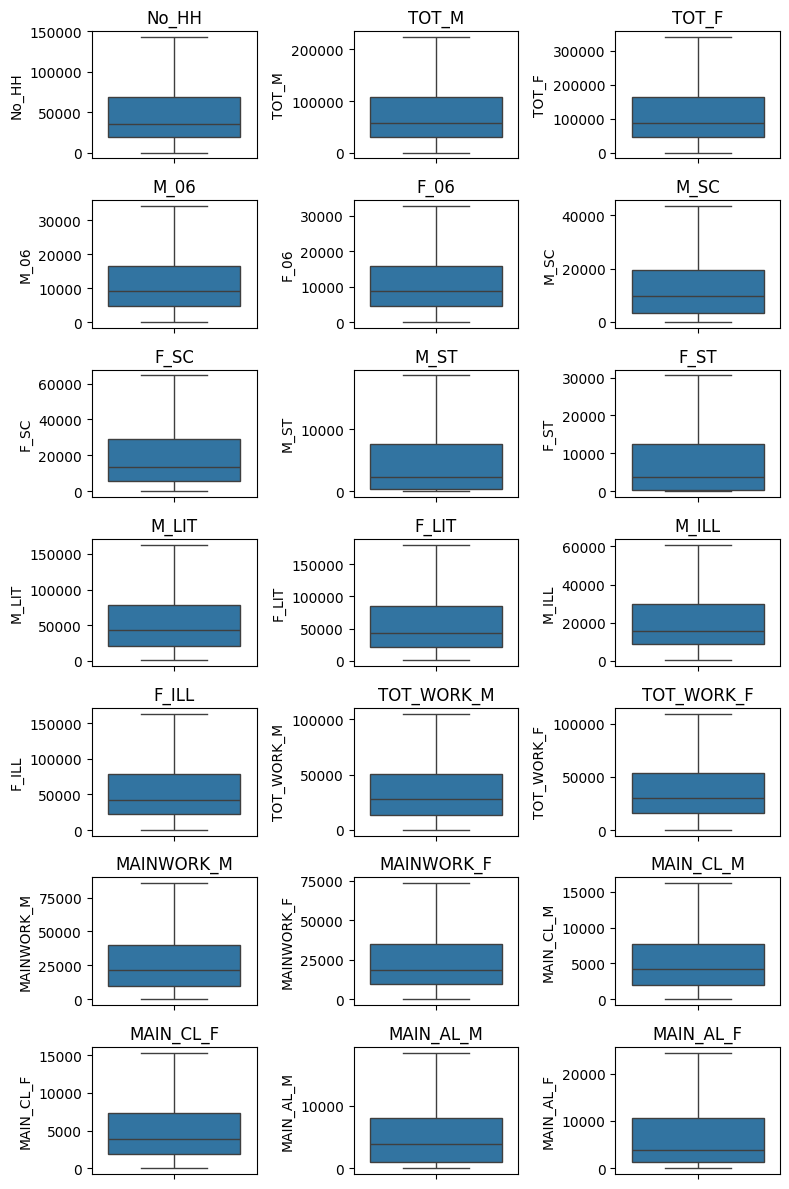

In [56]:
plt.figure(figsize = (8,12))
for i in range(21):
    plt.subplot(7, 3, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('{}'.format(feature_list[i]))
    plt.tight_layout()

In [218]:
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [219]:
df_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,-0.574198,-0.939617,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,-0.782092,-1.005083,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,0.137599,-1.141561,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,-0.437333,-1.203009,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,0.249489,-0.942767,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637


In [222]:
df_pca_scaled.describe().round(2)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,...,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.23,-1.26,-1.25,-1.25,-1.25,-1.08,-1.08,-0.84,-0.83,-1.24,...,-1.24,-1.20,-1.01,-1.03,-1.07,-1.01,-1.03,-1.05,-1.19,-1.18
25%,-0.74,-0.76,-0.76,-0.75,-0.73,-0.80,-0.77,-0.79,-0.79,-0.76,...,-0.75,-0.76,-0.75,-0.75,-0.75,-0.75,-0.77,-0.78,-0.76,-0.76
50%,-0.32,-0.29,-0.31,-0.27,-0.29,-0.29,-0.33,-0.45,-0.45,-0.27,...,-0.29,-0.30,-0.39,-0.40,-0.35,-0.39,-0.39,-0.33,-0.32,-0.28
75%,0.52,0.53,0.52,0.53,0.52,0.51,0.51,0.43,0.41,0.54,...,0.47,0.50,0.44,0.42,0.43,0.48,0.41,0.49,0.43,0.48
max,2.41,2.47,2.44,2.44,2.40,2.48,2.45,2.27,2.22,2.48,...,2.31,2.39,2.24,2.18,2.21,2.34,2.19,2.38,2.21,2.34


In [223]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [224]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

/Users/Sardiwal_Anirudh/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.936189616665265

In [277]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [278]:
pca.components_.round(2)

array([[ 0.15,  0.16,  0.16, ...,  0.14,  0.15,  0.14],
       [-0.12, -0.08, -0.09, ...,  0.04, -0.05, -0.04],
       [ 0.1 , -0.04,  0.03, ..., -0.1 , -0.13, -0.03],
       ...,
       [-0.05,  0.05, -0.01, ...,  0.12,  0.1 ,  0.2 ],
       [-0.  , -0.01,  0.  , ..., -0.21,  0.15,  0.4 ],
       [-0.15,  0.03, -0.06, ...,  0.14, -0.09,  0.1 ]])

In [279]:
pca.explained_variance_

array([35.64886379,  7.64357559,  3.76919551,  2.77722349,  1.90694892,
        1.1549031 ,  0.98772671,  0.46462991,  0.39670851,  0.32234689,
        0.27320737,  0.23564757,  0.18140111,  0.16924377,  0.13859233,
        0.13150585,  0.10380967,  0.09553338,  0.08585804,  0.08091387,
        0.06601791,  0.0630798 ,  0.04827561,  0.04595057,  0.04377475])

In [280]:
pca.explained_variance_ratio_

array([0.62444145, 0.13388829, 0.06602291, 0.04864709, 0.03340297,
       0.0202298 , 0.01730146, 0.00813867, 0.00694892, 0.00564637,
       0.00478562, 0.00412771, 0.0031775 , 0.00296455, 0.00242765,
       0.00230352, 0.00181838, 0.00167341, 0.00150393, 0.00141732,
       0.0011564 , 0.00110493, 0.00084562, 0.00080489, 0.00076678])

In [281]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12', '13','14','15','16','17','18','19','20','21','22','23','24','25'],
                                    index = df_pca_scaled.columns)

In [273]:
df_extracted_loadings.T

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
PC1,0.149222,0.159169,0.158209,0.156340,0.156814,0.143350,0.143537,0.018849,0.017878,0.155152,...,0.142987,0.133784,0.062964,0.056741,0.119102,0.113044,0.142140,0.141370,0.147629,0.142103
PC2,-0.115487,-0.080239,-0.093718,-0.020341,-0.014310,-0.079667,-0.087098,0.069101,0.067316,-0.105986,...,0.136839,0.166416,0.281881,0.287541,0.182341,0.177112,0.052925,0.035109,-0.049122,-0.039848
PC3,0.101528,-0.038662,0.028959,-0.074419,-0.068223,-0.037619,0.021350,0.323827,0.338705,-0.032107,...,-0.103565,0.033423,-0.120293,-0.088097,0.026176,0.164774,-0.144419,-0.102175,-0.126673,-0.028545
PC4,0.076814,0.052976,0.070022,0.028520,0.016398,0.010210,0.016244,0.091143,0.079554,0.089187,...,-0.018223,0.005954,0.208941,0.240499,-0.240416,-0.189408,-0.167554,-0.169020,0.024036,0.057402
PC5,-0.012090,-0.042344,-0.022927,-0.080339,-0.078326,-0.167893,-0.158092,0.418412,0.415965,-0.014033,...,0.094293,0.112351,-0.018070,-0.036293,0.016981,0.047538,0.014187,0.047504,0.191790,0.249765
PC6,0.082558,0.073667,0.082812,0.092379,0.080010,0.050969,0.054568,-0.231809,-0.214542,0.081378,...,0.111045,0.185882,-0.004600,0.022023,0.109387,0.189006,-0.149689,-0.233858,0.022904,0.042834
PC7,0.106896,-0.124085,-0.010291,-0.200807,-0.203411,-0.040399,0.053990,-0.355238,-0.327677,-0.067062,...,-0.025902,0.178500,0.009474,0.066497,-0.082858,0.109686,-0.050786,0.194686,-0.016338,0.175252
PC8,-0.099515,-0.108870,-0.115276,-0.132944,-0.139342,0.189170,0.177363,-0.071632,-0.078392,-0.102886,...,0.018271,-0.004071,-0.115859,-0.095449,-0.048660,-0.070176,0.038886,-0.151042,0.232577,0.325866
PC9,0.026100,0.032856,0.036405,0.138404,0.165715,-0.531744,-0.515063,-0.113019,-0.136031,-0.017445,...,-0.004772,-0.023984,-0.134057,-0.134239,-0.093357,-0.137706,0.075351,0.038072,0.013669,0.050915
PC10,0.068124,-0.048423,-0.022468,-0.157252,-0.145040,-0.098447,-0.065840,-0.008382,-0.028617,0.000581,...,0.106542,0.008600,0.180268,0.042602,0.160398,-0.045480,-0.084096,0.085163,0.033439,0.023700


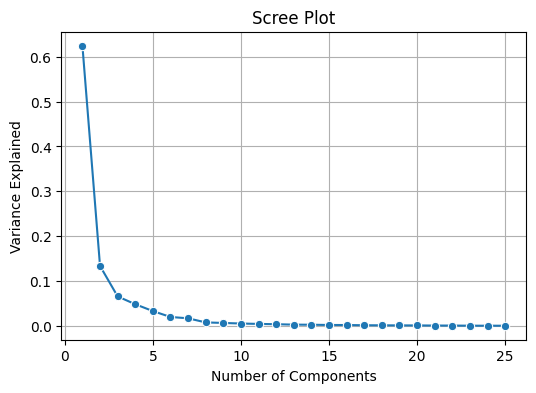

In [283]:
plt.figure(figsize=(6,4))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,26),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [284]:
np.cumsum(pca.explained_variance_ratio_)

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613])

In [285]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [286]:
df_selected.T

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
PC1,0.149222,0.159169,0.158209,0.156340,0.156814,0.143350,0.143537,0.018849,0.017878,0.155152,...,0.142987,0.133784,0.062964,0.056741,0.119102,0.113044,0.142140,0.141370,0.147629,0.142103
PC2,-0.115487,-0.080239,-0.093718,-0.020341,-0.014310,-0.079667,-0.087098,0.069101,0.067316,-0.105986,...,0.136839,0.166416,0.281881,0.287541,0.182341,0.177112,0.052925,0.035109,-0.049122,-0.039848
PC3,0.101528,-0.038662,0.028959,-0.074419,-0.068223,-0.037619,0.021350,0.323827,0.338705,-0.032107,...,-0.103565,0.033423,-0.120293,-0.088097,0.026176,0.164774,-0.144419,-0.102175,-0.126673,-0.028545
PC4,0.076814,0.052976,0.070022,0.028520,0.016398,0.010210,0.016244,0.091143,0.079554,0.089187,...,-0.018223,0.005954,0.208941,0.240499,-0.240416,-0.189408,-0.167554,-0.169020,0.024036,0.057402
PC5,-0.012090,-0.042344,-0.022927,-0.080339,-0.078326,-0.167893,-0.158092,0.418412,0.415965,-0.014033,...,0.094293,0.112351,-0.018070,-0.036293,0.016981,0.047538,0.014187,0.047504,0.191790,0.249765


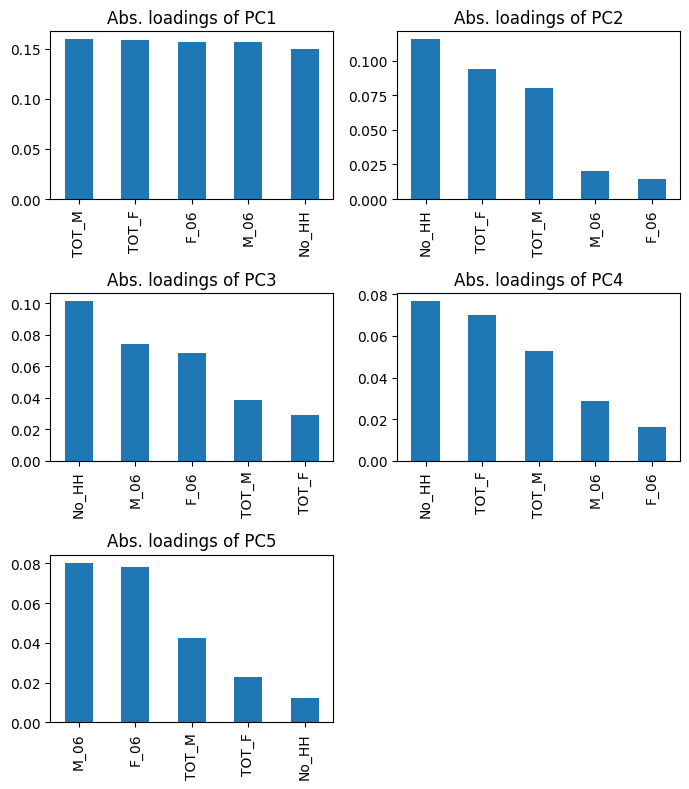

In [266]:
plt.figure(figsize = (7,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]].head()).T.sort_values(ascending = False).plot.bar()
    # plt.yticks(np.arange(0,.12,.02))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

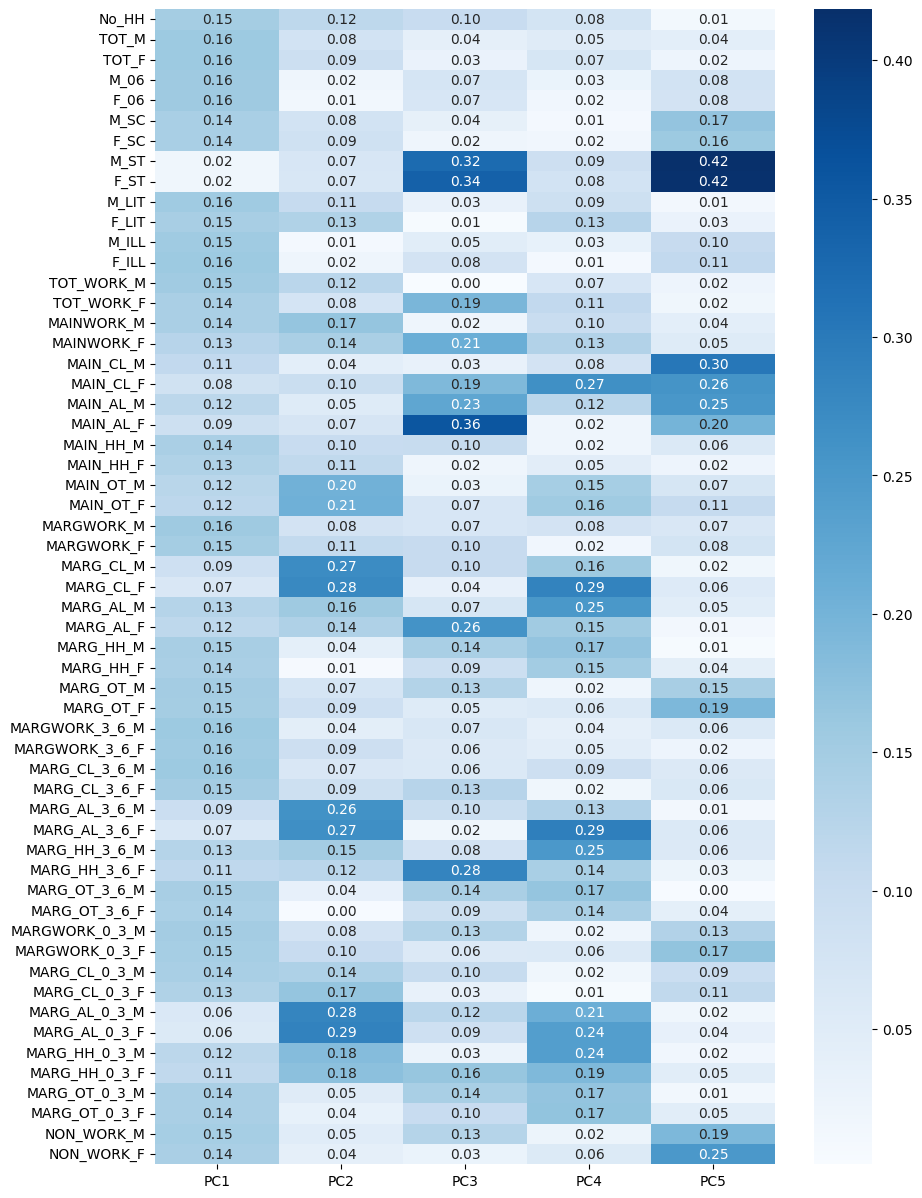

In [257]:
plt.figure(figsize = (10,15))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [275]:
pca1 = PCA(n_components=5, random_state=0)
pca_final = pca.fit_transform(df_pca_scaled)

In [276]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5
0,-5.528161,0.430378,-1.473827,-1.278049,0.376358
1,-5.492016,-0.106110,-2.015641,-1.750168,-0.006857
2,-7.474643,-0.217194,-0.247428,0.006079,0.556282
3,-7.919737,-0.652311,-0.659220,-0.735550,0.272465
4,-5.175695,2.304059,-1.157327,1.060796,1.080249
5,-3.647563,4.598733,-1.742810,3.301079,1.212639
6,-6.178820,-0.256962,-1.234310,-0.121392,-0.173580
7,-5.436802,0.237215,-1.664352,-1.163284,0.220704
8,-6.099449,0.004985,-1.563508,-1.537818,0.364566
9,-4.972562,-1.970847,-1.707058,-0.676605,0.614131


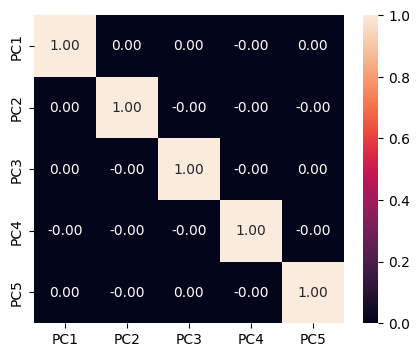

In [263]:
plt.figure(figsize = (5,4))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');